<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Martin Salinas Scussolin; 201773557-0 ; Malla Nueva </h4>
    <h4> Jose Quezada Silva ; 201773528-7 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Marzo 2019</h4></center>
</p>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 5 de abril.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

**Puntos bonus para todos:** Debido a que a veces hay preguntas que les piden una conclusión utilizando ciertos elementos, si lo desea, puede agregar elementos extra para hacer una mejor conclusión o concluir algo más que tenga sentido con lo anterior; estos gráficos pueden otorgar puntos bonus dependiendo de su calidad y del comentario que lo acompañe (con un máximo de 3 puntos bonus por pregunta, no acumulables si alcanza la nota máxima)

## 1. Sarcasmo en Reddit (30p)

Reddit es una página web muy conocida que, en simples palabras, es una compilación de muchos foros llamados "subreddits", en esta sección trabajará con un dataset que contiene una compilación de comentarios realizados por usuarios en distintos subreddits, los que vienen con una indicación de si el comentario es sarcástico o no.
[Fuente](https://www.kaggle.com/sherinclaudia/sarcastic-comments-on-reddit)

>a) **O:** Cargue los datos y resuma brevemente que contiene el dataset 

### Desarrollo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, stats
import matplotlib.dates as mdates


#carga del dataset
dt = pd.read_csv('reddit.csv')


El dataset contiene datos de comentarios de reddit, donde cada uno posee autor, fecha de creacion, puntaje, upvotes, downvotes, el comentario en si, un subreddit al cual pertenecen, y el comentario padre.

>b) ¿Existe algún subreddit donde los comentarios no sarcásticos predominen? ¿Y alguno donde predominen los comentarios sarcásticos? 

### Desarrollo

Usando los datos del inciso c, se puede ver que en varios subreddits predominan los comenterios no sarcasticos, por ejemplo: AskReddit, nba, nfl, etc.
En el caso de los comentarios sarcasticos, se pueden ver los siguientes subreddits: politics, worldnews, pcmasterrace, etc.

>c) Realice un top 10 con los subreddits que más se repiten en la etiqueta sin sarcasmo y un top 10 de los que más se repiten en la etiqueta con sarcasmo. ¿Existen similitudes/diferencias en ambas listas? ¿A qué se puede deber esto?

### Desarrollo

In [3]:
#agrupacion de los datos por subreddit y label
#se cuentan las repeticiones 
# data.head(n) muestra los primeros lugares del dataset, default= 5
most_repeated = dt.groupby(["label","subreddit"])["subreddit"].count().sort_values(ascending = False)
#se separa el dataset en 2 agrupado por label y subreddit, con la cantidad de comentarios respectiva
Zer = pd.DataFrame(most_repeated[0].reset_index(name = "count"))     # sin sarcasmo
One = pd.DataFrame(most_repeated[1].reset_index(name = "count"))     # con sarcasmo


#### Top 10 con subreddits sin sarcasmo

In [4]:
#top 10 con subreddits sin sarcasmo
Zer.head(10).set_index("subreddit")

,count
subreddit,
AskReddit,39310
politics,15586
funny,9840
leagueoflegends,9628
worldnews,9429
pics,8329
pcmasterrace,8228
nfl,6935
news,6698


#### Top 10 con subreddits con sarcasmo

In [5]:
#top 10 con subreddits con sarcasmo
One.head(10).set_index("subreddit")

,count
subreddit,
AskReddit,26367
politics,23910
worldnews,16948
leagueoflegends,11409
pcmasterrace,10760
news,10193
funny,8099
pics,7825
todayilearned,7754


Se ve que ambas listas son similares entre los primeros lugares puesto que los subreddits de los primeros lugares, son de interes general,son temas como la politica, noticias, juegos de fama mundial, y lugares donde se pueden realizar consultas de cualquier tipo.

>d) Construya una línea de tiempo (use la columna que estime más conveniente como eje de tiempo) y coloree los datos según su etiqueta de sarcasmo, comente lo que observa.

>*Consejo: puede agrupar comentarios y contar el total que se registra en ese momento del tiempo en vez de graficar cada comentario en la línea.*

### Desarrollo

Se quitan las columnas innecesarias para agrupar por intervalos de 4 meses y frecuencia respectivas.
Ademas, se crean dos nuevos dataset para facilidad de manipulacion. 
Uno con la etiqueta label = 0 (no sarcastico)
y label = 1 (sarcastico)

In [6]:
##Comentarios no sarcasticos

newNoS = pd.DataFrame(dt.loc[
        dt["label"] == 0]).drop(["label","comment",
                                 "author","subreddit","subreddit",
                                 "score", "ups","downs",
                                 "parent_comment","created_utc"],
                                 axis=1)

newNoS['date'] = pd.to_datetime(dt.date, format = '%Y.%m')
newNoS.index = newNoS.date

newNoS.insert(1, "count", 1) 

newNoS = newNoS.groupby(pd.Grouper(freq='5m')).sum().reset_index()

##Comentarios sarcasticos

newS = pd.DataFrame(dt.loc[
        dt["label"] == 1]).drop(["label","comment",
                                 "author","subreddit","subreddit",
                                 "score", "ups","downs",
                                 "parent_comment","created_utc"],
                                 axis=1)

newS['date'] = pd.to_datetime(dt.date, format = '%Y.%m')
newS.index = newS.date

newS.insert(1, "count", 1) 

newS = newS.groupby(pd.Grouper(freq='5m')).sum().reset_index()

#### Tabla con las fechas y sus frecuencias

In [7]:
alpha2 = pd.concat([newNoS,newS],axis=1,sort=False)
print("Comentarios no sarcasticos & comentarios sarcasticos")
alpha2

Comentarios no sarcasticos & comentarios sarcasticos


,date,count,date,count
0,2009-01-31,32,2009-01-31,72
1,2009-06-30,210,2009-06-30,344
2,2009-11-30,419,2009-11-30,504
3,2010-04-30,678,2010-04-30,890
4,2010-09-30,960,2010-09-30,1191
5,2011-02-28,1389,2011-02-28,1901
6,2011-07-31,2152,2011-07-31,2637
7,2011-12-31,3013,2011-12-31,3465
8,2012-05-31,3961,2012-05-31,4592
9,2012-10-31,5889,2012-10-31,6755


### Timeline Comentarios Sarcasticos

C:\Users\marth\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


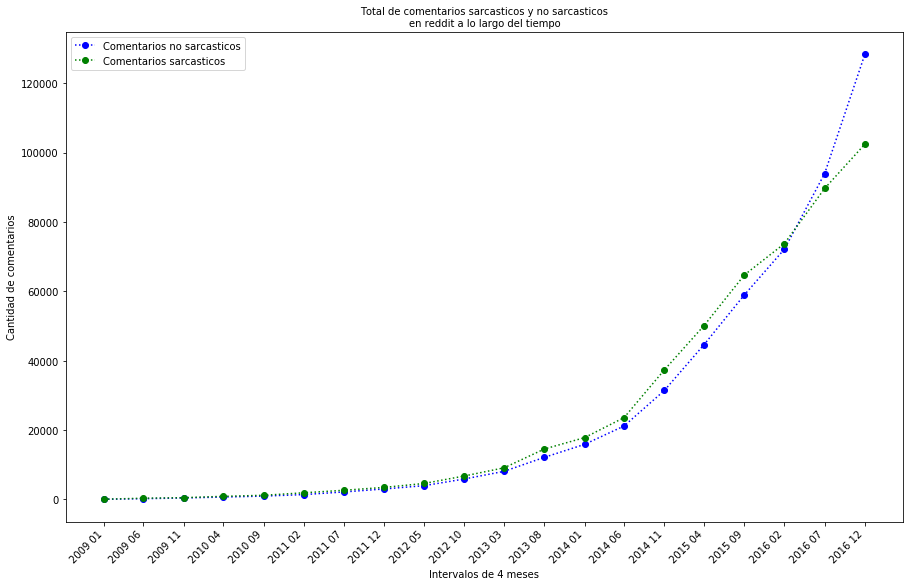

In [8]:
#se grafican los datos en una linea temporal por cantidad segun fecha y etiqueta label con 
#los nuevos dataframes

#plot

#tamaño
plt.figure(figsize=(15,10))

#           X               Y
plt.plot(newNoS["date"],newNoS["count"], 
         'go',
         label="Comentarios no sarcasticos",
         color="blue",linestyle=':')

plt.plot(newS["date"],newS["count"], 
         'go',
         label="Comentarios sarcasticos",linestyle=':')

#setting de fechas
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %m'))
plt.gcf().autofmt_xdate() # Rotacion de las fechas


plt.legend(loc='best')
plt.xticks(newNoS["date"], rotation='45')
plt.xlabel("Intervalos de 4 meses", fontsize=10)
plt.ylabel("Cantidad de comentarios", fontsize=10)
plt.title("Total de comentarios sarcasticos y no sarcasticos\nen reddit a lo largo del tiempo", fontsize=10)
plt.show()

Del grafico, primero se observa que la cantidad de comentarios en general va en aumento, lo que refleja
el incremento de personas que utilizan reddit. Segundo, se puede ver que en un principio los comentarios 
sarcasticos predominaban pero por el 2016 empezaron a decaer, esto puede ser por la seleccion de Trump como presidente.
Tercero, los comentarios no sarcasticos comenzaron a aumentar a la vez que los comentarios sarcasticos empezaron a decaer.

>e) Haga un histograma y boxplot de los puntajes de comentarios sarcásticos y no sarcásticos, comparelos y concluya a partir de lo que observa, puede agregar otro tipo de gráficos si desea para apoyar su conclusión.

### Desarrollo

Se hace lo mismo que con las fechas, pero esta vez se toman los puntajes de cada comentario sin contar las frecuencias

### Histograma Comentarios no Sarcasticos V/S Comentarios Sarcasticos

In [9]:
#se separan los datos por scores
#-------------------------No Sarcasticos
newHistNoS = pd.DataFrame(dt.loc[
        dt["label"] == 0]).drop(["label","comment",
                                 "author","subreddit","subreddit",
                                 "date", "ups","downs",
                                 "parent_comment","created_utc"],axis=1)
#se cambia el nombre de columna para mejor presentacion
newHistNoS.columns=["Score No Sarcasticos"]

#--------------------------Sarcasticos
newHistS = pd.DataFrame(dt.loc[
        dt["label"] != 0]).drop(["label","comment",
                                 "author","subreddit","subreddit",
                                 "date", "ups","downs",
                                 "parent_comment","created_utc"],axis=1)
newHistS.columns=["Score Sarcasticos"]

In [10]:
#se filtran los puntajes entre -30 < [puntaje] < 30 para mejor presentacion
df1 = pd.DataFrame(newHistS.loc[
                                (-30 < newHistS["Score Sarcasticos"]) 
                                 & (newHistS["Score Sarcasticos"] < 30)])

df2 = pd.DataFrame(newHistNoS.loc[
                                (-30 < newHistNoS["Score No Sarcasticos"]) 
                                &
                                (newHistNoS["Score No Sarcasticos"] < 30)])

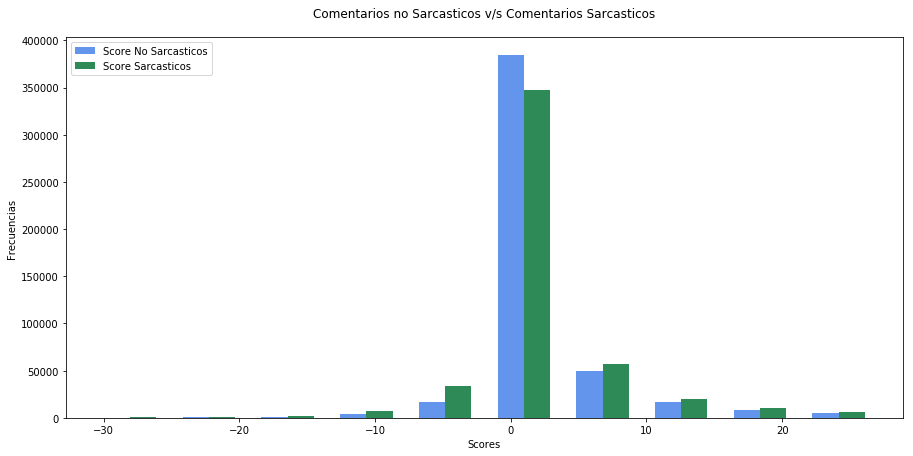

In [11]:
#Se prepara el grafico, en este caso se utiliza un grafico de barras para hacer un histograma con numpy
#esto, con el fin de mejorar la presentacion y facilitar la comparación de los histogramas

#-----------tamaño histograma
fig, ax = plt.subplots(figsize=(15,7))

#-----------se generan los ejes x e y 
a_heights, a_bins = np.histogram(df2['Score No Sarcasticos'])
b_heights, b_bins = np.histogram(df1['Score Sarcasticos'], bins=a_bins)

#-----------Separacion de barras
width = (a_bins[1] - a_bins[0])/3

#-----------graficas
ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue',label= 'Score No Sarcasticos')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen',label='Score Sarcasticos')

plt.legend(loc='upper left', fontsize=10)
plt.title("Comentarios no Sarcasticos v/s Comentarios Sarcasticos\n")
plt.xlabel("Scores", fontsize=10)
plt.ylabel("Frecuencias", fontsize=10)

plt.show()

Se puede ver que ambos histogramas están sesgados hacia la izquierda y además, una alta cantidad de comentarios con puntaje entre 0 y 10, lo que indica que la gente, o esta votando muy equitativamente, o hay una alta cantidad de comentarios con muy bajo puntaje, cosa que suele suceder frecuentemente. Esto,se puede ver representados en los boxplots

### Boxplot Comentarios no Sarcasticos v/s Comentarios Sarcasticos

#### Concatenacion de datasets para graficarlos en un solo grid

In [12]:
dfs = pd.concat([df2.reset_index().drop("index",axis=1),
                 df1.reset_index().drop("index",axis=1)], 
                 sort=False,axis=1)

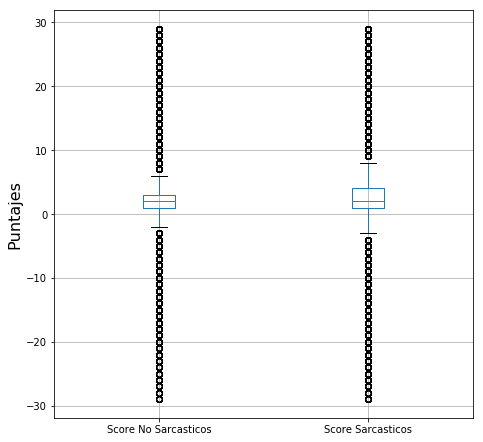

In [13]:
plt.figure(
            figsize=(7.5,7.5))
dfs.boxplot()
plt.ylabel('Puntajes', fontsize=16)
plt.show()

### Descripción de los datos en boxplots

In [14]:
pd.concat([df1.describe()[1:],df2.describe()[1:]],axis=1)

,Score Sarcasticos,Score No Sarcasticos
mean,3.131419,3.111063
std,5.495288,4.877059
min,-29.000000,-29.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,3.000000
max,29.000000,29.000000


En ambos boxplots se puede apreciar que la media es similar y la mediana es la misma, pero la desviacion estandar de los comentarios sarcasticos es ligeramente mayor que la de los no sarcasticos. Además, se puede ver que el 75% de los datos sarcásticos es mayor (por una unidad) en puntaje que el 75% de los no sarcásticos.

## 2. Simulaciones 

Una de las gracias de tener una máquina con alta capacidad de cómputo es el poder realizar simulaciones. Las simulaciones nos permiten recrear experimentos que requieren una gran cantidad de datos, por ejemplo, lanzar un dado 10000 veces y determinar las probabilidades de cada resultado posible.


### 2.1 Lanzamiento de Agujas (30p)

Imagine que tiene un puñado de agujas ($n$ agujas) y las lanza al aire, estas agujas caen aleatoriamente dentro de un espacio de 20x20 unidades (asuma que la aguja puede quedar con una parte afuera y otra adentro si cae en alguno de los bordes/cerca de un borde de este espacio), este espacio tiene líneas horizontales cada 1 unidad en el eje Y, obviando los bordes inferior y superior de este espacio, usted está interesado en determinar la probabilidad de que una aguja atraviese cualquiera de estas líneas horizontales, para ello ha decidido simular este experimento utilizando el centroide de la aguja (posición donde cae) y el ángulo medido respecto a la horizontal que atraviesa el centroide $\alpha$ (ver imagen)

<img src="img/aguja.png" style="float:center;height:100px">

El largo de la aguja es el mismo que la separación entre las lineas horizontales (1 unidad)


Calcule la probabilidad utilizando $n =10,100,1000,10000,100000$ agujas

Puntos bonus por :
* (5) Probar con tamaños distintos del espacio y concluir comparando con los otros casos
* (5) Añadir 1 gráfico por cada $n$ donde se vea el espacio y las agujas después de caer, recuerde hacer un comentario respecto al gráfico, no solo incluirlo.

### Desarrollo

*Es necesario en primer lugar realizar ciertas aclaraciones:*

Se asume que con $\alpha$ = $\pi$/2 y con el centroide ubicado justo en la mitad entre dos líneas horizontales punteadas, ambos extremos las tocan.

Se realiza el análisis en un diferencial del eje x, y en la mitad de una de las secciones limitadas por líneas horizontales. Esto puesto que en todos los demás puntos la probabilidad es equivalente.

De esta misma manera, se toma en cuenta un $\alpha$ de valor máximo $\pi$/2, puesto que todos los demás casos son equivalentes.

La condición para que una aguja toque al menos una de estas líneas es que la distancia del centroide a una de ellas sea menor o igual al componente en el eje y de una de las mitades de la aguja, como puede verse en la imagen a continuación.
<img src = "img/aguja23.png" style = "float: center">
Al graficar tal función se obtiene la siguiente figura.

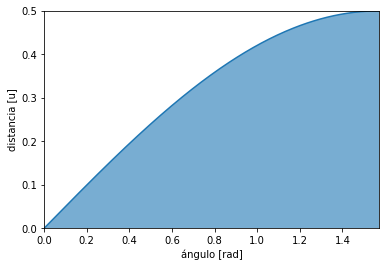

In [15]:
X = np.linspace(0,2*np.pi,1000)
plt.plot(X,0.5*np.sin(X))
plt.fill_between(X, 0, 0.5*np.sin(X), alpha = 0.6)

plt.xlabel("ángulo [rad]")
plt.ylabel("distancia [u]")
plt.xlim(0,3.14159265359/2)
plt.ylim(0,0.5)
plt.show()

Al calcular el área bajo la curva es posible obtener todas las formas en que puede caer dependiendo del ángulo, por lo que bastaría con dividir este valor por $\pi$/2 para obtener la probabilidad.

In [16]:
Is = integrate.quad(lambda x: 0.5 * np.sin(x), 0, 0.5 * 3.14159265359)

Pa = Is[0] / (3.14159265359/2)
print(Pa)

0.3183098861838026


Es necesario considerar también la probabilidad de que una aguja caiga en una zona "fuera de peligro" de tocar alguna de las lineas, sea cual sea su ángulo, puesto que el extremo inferior y superior no cuentan en el cálculo de la probabilidad requerida.
<img src = "img/znopeligro.png" style = "float: center; height: 300px">


La altura de cada zona es de 0.5 unidades, por lo que la proporción de ambas con respecto al área total es de 1/20, obteniendo 0.95 (o sea 1 - 1/20) como la probabilidad de que no caiga en ninguna de ellas.
Este factor se multiplica por la probabilidad, llegando a la probabilidad de una aguja para el.

In [17]:
Pa_noseg = Pa * 0.95
print (Pa_noseg)

0.3023943918746125


In [18]:
def prob_ag(n):
    c = 0
    p1 = 0
    for k in range(1,n+1):
        
        #c += np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * Pa_noseg** k * (1-Pa_noseg)**(n-k) 
        pk = stats.binom.pmf(k,n,Pa_noseg)
        if k == 1: p1 = pk
        c += pk
        
    return (c,p1)

p = prob_ag(10)
print ("P(X>=1): ",p[0],"\nP(X=1): ", p[1])

P(X>=1):  0.9727039608252517 
P(X=1):  0.1183214279055808


In [19]:
#n = 100
p = prob_ag(100)
print ("P(X>=1): ",p[0],"\nP(X=1): ", p[1])

P(X>=1):  0.9999999999999747 
P(X=1):  9.953139638938104e-15


In [20]:
#n = 1000
p = prob_ag(1000)
print("P(X = 1): ",p[0], "\nP(X >= 1): ",p[1])

P(X = 1):  1.0000000000005467 
P(X >= 1):  1.765741186558631e-154


A partir de n = 10000, la probabilidad de X = 1 es tan baja que el programa le asigna el valor de 0, mientras que la de X >= 1 se sigue aproximando cada vez más a 1 (se pasa por errores de aproximación).

In [21]:
#n = 10000
p = prob_ag(10000)
print ("P(X>=1): ",p[0],"\nP(X=1): ", p[1])

P(X>=1):  1.0000000000033034 
P(X=1):  0.0


In [22]:
#n = 100000
p = prob_ag(100000)
print ("P(X>=1): ",p[0],"\nP(X=1): ", p[1])

P(X>=1):  0.9999999999096603 
P(X=1):  0.0


In [23]:
def aguja():
    ang = 180 * np.random.sample()
    c = 0.5 * np.cos(ang)
    s = 0.5 * np.sin(ang)
    x = 20 * np.random.random_sample()
    y = 20 * np.random.random_sample()
    plt.plot([x + c, x , x - c], [y + s, y, y - s])

def aguja50():
    ang = 180 * np.random.sample()
    c = 0.5 * np.cos(ang)
    s = 0.5 * np.sin(ang)
    x = 50 * np.random.random_sample()
    y = 50 * np.random.random_sample()
    plt.plot([x + c, x , x - c], [y + s, y, y - s])


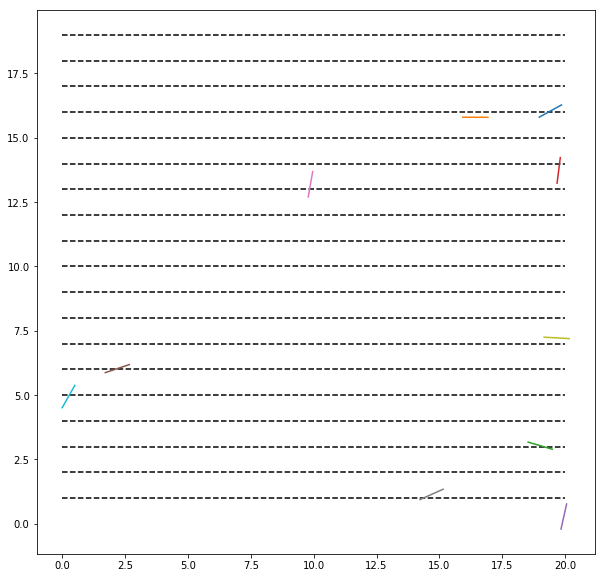

In [24]:
plt.figure(figsize = (10,10))
plt.hlines(range(1,20),0,20,linestyles="dashed")
for i in range(10):
    aguja()
plt.show()

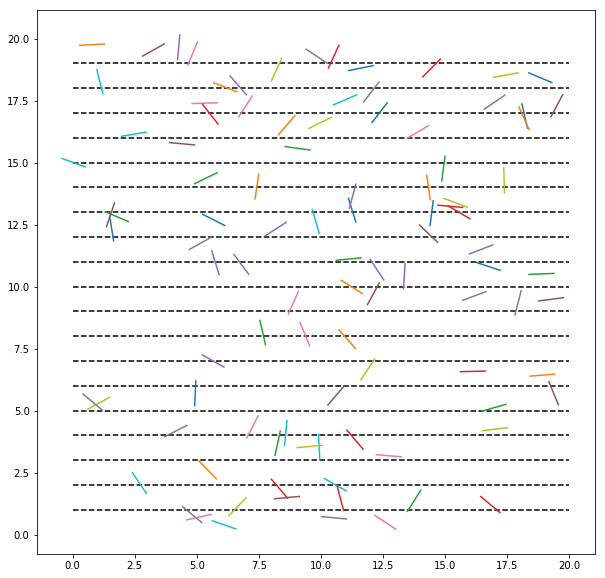

In [25]:
plt.figure(figsize = (10,10))
plt.hlines(range(1,20),0,20,linestyles="dashed")
for i in range(100):
    aguja()
plt.show()

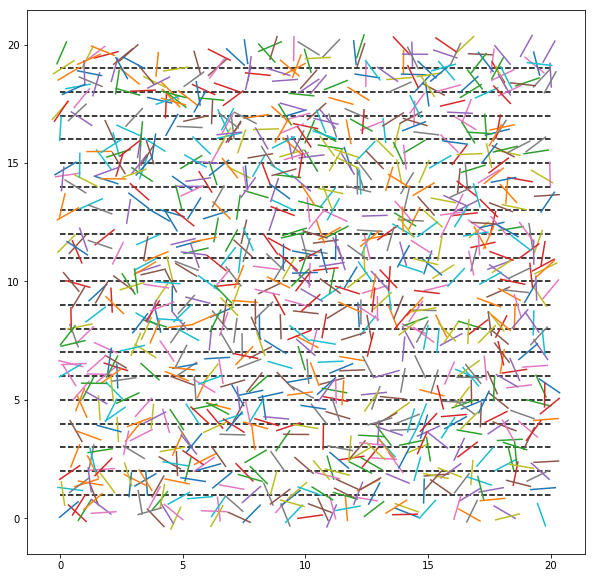

In [26]:
plt.figure(figsize = (10,10))
plt.hlines(range(1,20),0,20,linestyles="dashed")
for i in range(1000):
    aguja()
plt.show()

KeyboardInterrupt: 

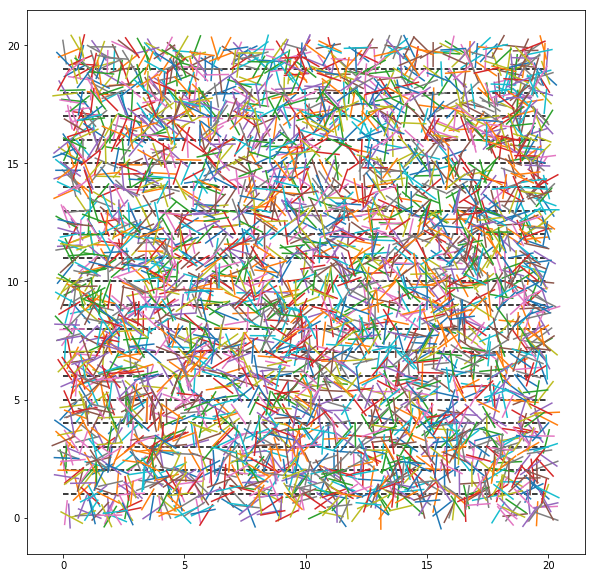

In [27]:
plt.figure(figsize=(10,10))
plt.hlines(range(1,20),0,20,linestyles="dashed")
for i in range(10000):
    aguja()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.hlines(range(1,20),0,20,linestyles="dashed")
for i in range(100000):
    aguja()
plt.show()

#### Observaciones
Se observa en los gráficos que, aoarentemente, se cumple con la probabilidad de manera aproximada, o sea que, hay un gran porcentaje de agujas que entran en contacto con las líneas puntuadas horizontales.
Es fundamental hacer notar, de todos modos, que este valor se ve disminuido, sobretodo al aumentar el número de agujas, al no considerar los extremos inferior y superior del área, lo que produce una mayor cantidad de agujas que se mantengan lejos de las líneas.

In [ ]:
def aguja50():
    ang = 180 * np.random.sample()
    c = 0.5 * np.cos(ang)
    s = 0.5 * np.sin(ang)
    x = 50 * np.random.random_sample()
    y = 50 * np.random.random_sample()
    plt.plot([x + c, x , x - c], [y + s, y, y - s])
    
plt.figure(figsize = (10,10))
plt.hlines(range(1,50),0,50,linestyles="dashed")

for i in range(10):
    aguja50()
    

In [ ]:
plt.figure(figsize = (10,10))
plt.hlines(range(1,50),0,50,linestyles="dashed")

for i in range(100):
    aguja50()

### 2.2 Cadenas de Markov (40p)

Las cadenas de markov son un modelo estocástico para describir una secuencia de sucesos donde la probabilidad de ir a un estado siguiente depende solamente del estado actual, esto se puede modelar de la siguiente forma:

$$ S_{n+1} = S_{n}\cdot P$$

Donde $P$ se conoce como matriz de transición y $S_{i}$ las matrices de estado ($S_{0}$ es conocida). Una cadena de markov se dice regular si su matriz de transición es regular, esto quiere decir que alguna potencia de $P$ tiene todas sus entradas positivas (para este caso 0 no es positivo).

Si se tiene una cadena de markov regular, en algún momento de la secuencia se encontrará una matriz de estado tal que:

$$ S_{f} \cdot P = S_{f}$$ 

A esta matriz $S_{f}$ se le conoce como matriz estacionaria.

Si desea profundizar más:
- [MC 1](https://www.youtube.com/watch?v=uvYTGEZQTEs)
- [MC 2](https://www.youtube.com/watch?v=jtHBfLtMq4U)
- [MC 3](https://www.youtube.com/watch?v=P8DuuiINAo4&t)
- [MC 4](https://www.youtube.com/watch?v=31X-M4okAI0)
- [MC 5](https://www.youtube.com/watch?v=-kwnnNSGFMc)


**Enunciado**

Tres compañías de comida rápida están compitiendo por el primer lugar en la supremacía de comida rápida. 

* Si un cliente originalmente es fiel a "Sansafood" tiene un $65\%$ de probabilidad de quedarse fiel a esta, un $20\%$ de cambiarse a "LDS ltda" y un $15\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "LDS ltda" tiene un $40\%$ de probabilidad de quedarse fiel a esta, un $30\%$ de cambiarse a "Sansafood" y un $30\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "Wenzi's" tiene un $70\%$ de probabilidad de quedarse fiel a esta, un $10\%$ de cambiarse a "Sansafood" y un $20\%$ de cambiarse a "LDS ltda".

En un comienzo 200 clientes pertenecen a "Sansafood", 180 a "LDS ltda" y 20 a "Wenzi's".

>a) Identifique la matriz de transición y la matriz de estado inicial

### Desarrollo

Por el enunciado se tiene que la matriz de transicion, es P, donde cada posicion de la matriz excepto la diagonal, representa la probabilidad de cambiarse de compañia, y por lo tanto, la diagonal representa la probabilidad quedarse en la misma.

La matriz de estado inicial es S_0 (distribucion) actual de los clientes.

In [ ]:
###   P - matriz transicion

###                S   L    w
###            s [.65 .2   .15]
###            l [.3  .4   .3 ]
###            w [.1  .2   .7 ]

P = np.array([[0.65, 0.2, 0.15],
              [0.3,  0.4, 0.3 ],
              [0.1,  0.2, 0.7 ]])

### matriz de estado inicial S_0

###                S         L       W
###            [200/400  180/400  20/400]

S_0 = np.array([[0.5,     0.45,   0.05]])

S_1 = S_0.dot(P)

#### Matriz de transicion

In [ ]:
PPIH = np.reshape(P,(3,3))
print(PPIH)

#### Matriz de estado inicial S_0

In [ ]:
PPINH = np.reshape(S_0,(1,3))
print(PPINH)

>**O:** b) Haga un diagrama de transición 

### Desarrollo

Las flechas en el diagrama representan la decision de una persona de cambiarse de compañia
los núeros representanla proababilidad de que una persona se cambie de compañía

<img src="img/transicion.png">

>**O:** c) ¿Este problema es un caso de una cadena de markov regular? ¿Por qué?

### Desarrollo

Si, dado que el caso que se presenta posee una matriz cuyos valores internos son todos positivos, dado que 
según la definición de cadena de Markov, para que sea regular, los valores de la matriz deben ser todos positivos.

>d) ¿Existirá la matriz estacionaria en este caso? Si su respuesta es sí, obténgala.

### Desarrollo

In [ ]:
# En este codigo, se busca la matriz estacionaria usando un sinfin de iteraciones hasta que la encuentra
# planteado en la definicionS_act = S_0.dot(P)
S_act = S_1
if (S_act == S_0).all():
    S_tr = S_act
else:
    while(1):
        S_tr = S_act.dot(P)
        if (S_tr == S_act).all():
            break
        S_act = S_tr
        
# se comprueba con la multiplicacion de la matriz estacionaria con la matriz de transicion

print("S_transicion supuesta ============>",S_tr)

print("multiplicacion S_transicion * P ==>",S_tr.dot(P))


    

>e) Después de pasado mucho tiempo. ¿Quién tendrá una mayor cantidad de clientes? Asuma que la matriz de transición será válida por todo este periodo arbitrario de tiempo y no llegarán ni saldrán más clientes del mundo de comida rápida. **No realice esta simulación como una multiplicación de matrices**, use las probabilidades y las cantidades dadas. Compare con d) 

### Desarrollo

Se considera:
mucho tiempo = 100000 iteraciones


In [ ]:
#funcion que actualiza la cantidad de clientes por compañía usando los datos de la matriz de transición
def trans(tup_cl):

    scl,lcl,wcl = tup_cl
    
    #Sansafood
    SFcl = scl * .65 + lcl * 0.3 + wcl * 0.1
    
    #LDS ltda
    LDScl = lcl * 0.4 + scl * 0.2 + wcl * 0.2
    
    #Wenzi's
    Wcl = wcl * 0.7 + scl * 0.15 + lcl * 0.3
    
    return (int(SFcl),int(LDScl),int(Wcl))

#clientes iniciales
t_cl = (200,180,20)

#se aplica iterativamente
for i in range(1000000):
    t_cl = trans(t_cl)

for i in t_cl:
    print("frecuencia absoluta: ",i)
    print("frecuencia relativa: ", i/400,"\n")


Al aplicar la probabilidad de la fidelidad de los clientes a cada grupo de ellos iterativamente, se obtienen, después de muchas iteraciones, frecuencia relativas similares a las obtenidas en la matriz estacionaria del item anterior.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el  día 31 de Marzo a las 23hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.2
+ La versión de Python que se usará para revisar es 3.6.8
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)